<h1 style="font-family:cursive; font-size:265%; color:#ba74ee ;"> <b> Navigate throughout the notebook <a id='top'></a> </b></h1>

[1. Getting Data Ready](#1)<br>
[2. Create DataLoader](#2)<br>
[3. Training](#3)





<!-- # 
<h1 style="font-family:cursive; font-size:265%; color:#ba74ee ;"> <b> Navigate throughout the notebook <b><a id='top'></a></h1> -->


#  
<h1 style="font-size:260%; font-family:cursive; color:#ba74ee;"> <b>1. Getting Data Ready <a id="1"></a></b></h1>

In [1]:
import os
import pathlib
from pathlib import Path 

## <p style="font-family:cursive; color:#8c929b;">1.1 Creating train and test directory and exploring them</p>

In [2]:
image_path = Path("data/food-101")
train_dir  = image_path/"Train"
test_dir   = image_path/"Test"

### <p style="font-family:cursive; color:#8c929b;">Checking number of image samples in each set</p>

In [3]:
print(f"Number of images in Training set is: {len(list(train_dir.glob('*/*.jpg')))}\nNumber of images in Testing set is: {len(list(test_dir.glob('*/*.jpg')))}")
# this is memory consuming as we have to make list here

Number of images in Training set is: 70700
Number of images in Testing set is: 30300


In [4]:
train_image_count = sum(1 for _ in train_dir.rglob('*.jpg'))
test_image_count = sum(1 for _ in test_dir.rglob('*.jpg'))

#rglob recursively seraches for .jpg file. 

print(f"Number of images in Training set is: {train_image_count}")
print(f"Number of images in Testing set is: {test_image_count}")

#better and memory efficient alternative

Number of images in Training set is: 70700
Number of images in Testing set is: 30300


## <p style="font-family:cursive; color:#8c929b;">1.2 Finding Class Labels and converting them to class index</p>

In [5]:
class_names = sorted(os.listdir(train_dir))  
    # as we have different folders for each class so we can just list the folders to get the class names and we sort them for ease
class_to_idx = { name:i for i, name in enumerate(class_names)}
    # As ml model cannot work with string labels so we convert them to integer labels

print(f"Number of classes in the dataset is: {len(class_names)}")
print(f"Class names: {class_names}")

Number of classes in the dataset is: 101
Class names: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_s

## <b>[Go to top](#top)</b>

# 
<h1 style = "font-size:260%; font-family:cursive; color:#ba74ee "> <b>2. Create DataLoader  <a id="2"></a></b></h1>

For detailed theory of all the code section please refoer to my another repo: [DeepLearning with PyTorch](https://github.com/cruvss/Deeplearning_X_PyTorch)

In [6]:
import torch
import torchvision
from torchvision import transforms,datasets
from torch import nn 
from timm import create_model  

c:\Users\sachi\anaconda3\envs\DeepLearning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### <p style="font-family:cursive; color:#8c929b;">Load the Pretrained Model</p>

In [7]:
model = create_model('deit_small_patch16_224', pretrained=True, num_classes=101)

In [10]:
sum(p.numel() for p in model.parameters())

21704549

### <p style="font-family:cursive; color:#8c929b;">Create train and test Transforms </p>

In [11]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


## <p style="font-family:cursive; color:#8c929b;">2.1 Using ImageFolder to Create Dataset and create the dataloader</p>

In [12]:
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9306722..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2641394..2.3585434].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..2.4285715].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


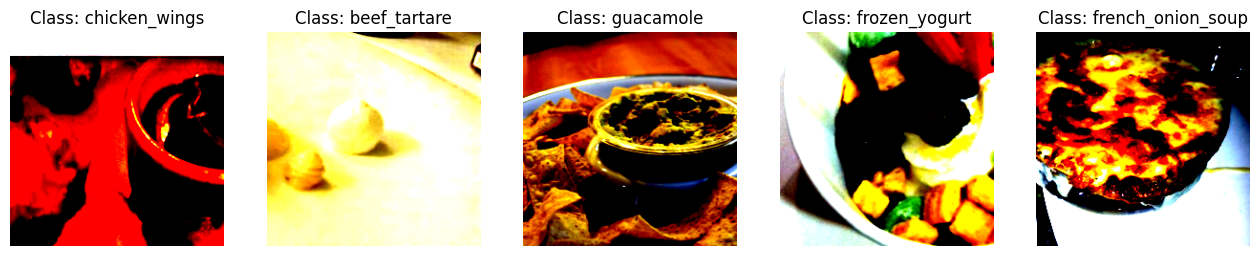

In [13]:
# Displaying some random Images from the  dataset we created.
import random
import matplotlib.pyplot as plt

def disp_random_images(dataset,classes,n,seed):
    random.seed(seed)

    random_samples_idx = random.sample(range(len(dataset)), k =n)

    plt.figure(figsize=(16,8))

    for i, sample in enumerate(random_samples_idx):

        img,label = dataset[sample][0], dataset[sample][1]

        img_adjust = img.permute(1,2,0)

        plt.subplot(1,n,i+1)
        plt.imshow(img_adjust)
        plt.axis(False)
        title = f"Class: {classes[label]}"
        plt.title(title)
disp_random_images(train_dataset,class_names,5,seed=42)

In [14]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

## [Go to top](#top)

# 
<h1 style = "font-size:260%; font-family:cursive; color:#ba74ee "> <b>3. Training Preparation <a id="3"></a></b></h1>

In [15]:
import torch.optim as optim


In [16]:
#Define hyperparameters
EPOCHS = 10
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


## <p style="font-family:cursive; color:#8c929b;">3.1 Freeze all inner layer of pretrained model</p>

In [18]:
#no need of layer freezing
model=model.to(DEVICE)

## <p style="font-family:cursive; color:#8c929b;">3.2 Define Loss function and optimizer</p>

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

## <p style="font-family:cursive; color:#8c929b;">3.3 Training and Testing loop</p>

In [20]:
from tqdm import tqdm
from typing import Dict, List, Tuple
from tqdm import tqdm


In [32]:

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  model.train()
  
  train_loss, train_acc= 0, 0
  
  for batch, (X,y) in enumerate(dataloader):
      X,y= X.to(device), y.to(device)
      
      #forward pass
      y_pred =  model(X)
      
      #calculate the loss
      loss =  loss_fn(y_pred, y)
      train_loss += loss.item()
      
      #optimizer zero grad
      optimizer.zero_grad()
      
      #loss backward
      loss.backward()
      
      #optimizer step
      optimizer.step()
      
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1),dim=1)
      train_acc += (y_pred_class==y).sum().item()/len(y_pred)
    
      # Adjust metrics to get average loss and accuracy per batch 
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  print(f"X device: {X.device}")
  print(f"Model device: {next(model.parameters()).device}")
  return train_loss, train_acc

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval() 

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1) #softmax gare ni na gare ni same thing
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch 
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for 
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]} 
    For example if training for epochs=2: 
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]} 
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  # Return the filled results at the end of the epochs
  return results

In [ ]:
train(model=model,
              train_dataloader=train_loader,
              test_dataloader=test_loader,
              loss_fn=criterion,
              optimizer=optimizer,
              epochs=15,
              device=DEVICE)

In [21]:
from timm import create_model

# Recreate the model architecture
model = create_model('deit_small_patch16_224', pretrained=False, num_classes=len(class_names))
model.load_state_dict(torch.load(r'D:\Code\Machine_Learning\DeepLearning\Food101\models\deit_food101_weights.pth'))

# Move the model to the correct device
model = model.to(DEVICE)
model.eval()  # Set to evaluation mode

C:\Users\sachi\AppData\Local\Temp\ipykernel_18716\967839294.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r'D:\Code\Machine_Learning\D

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [24]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=DEVICE):
    
    
    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    ### Predict on image ### 

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability 
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

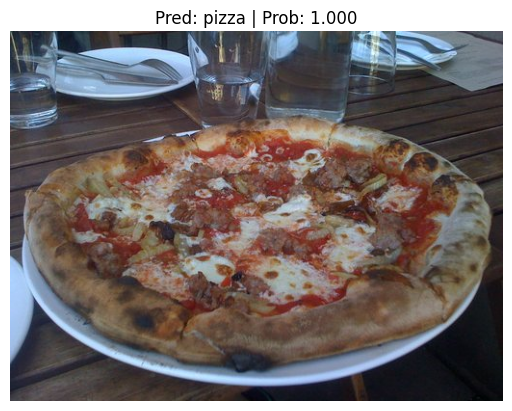

In [29]:
pred_and_plot_image(model=model,
                    image_path=r'data\food-101\Test\pizza\5764.jpg',
                    class_names=class_names,)

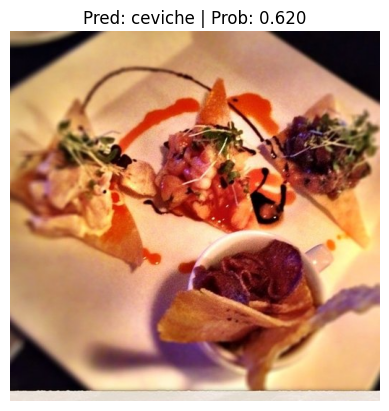

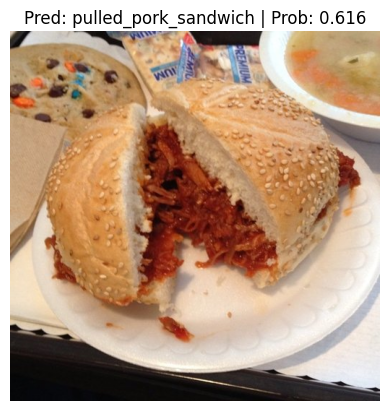

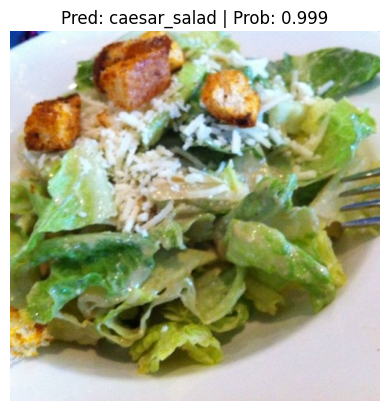

In [25]:
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # get list all image paths from test data 
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))